<a href="https://colab.research.google.com/github/shin0105/4YP/blob/master/UCI_dataset_classification_mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GPyOpt
!pip install GPy

In [3]:
#import packages

#basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Bayesian optimization packages
import GPy
import GPyOpt

#ML Algorithm packages
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import preprocessing

In [4]:
#dataset = UCI mushroom https://archive-beta.ics.uci.edu/dataset/73/mushroom
with open("agaricus-lepiota.names") as f:
    print(f.read())

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [5]:
#dataset = UCI Car Evaluation
names=['cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment',
       'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
       'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
       'veil-type','veil-color','ring-number','ring-type','spore-print-color',
       'population','habitat','class']
df = pd.read_csv('agaricus-lepiota.data', names = names)
df.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
#frequency distribution
for col in names: 
    print(df[col].value_counts())

#checking missing values
df.isnull().sum()

e    4208
p    3916
Name: cap-shape, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-surface, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-color, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: bruises?, dtype: int64
f    4748
t    3376
Name: odor, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: gill-attachment, dtype: int64
f    7914
a     210
Name: gill-spacing, dtype: int64
c    6812
w    1312
Name: gill-size, dtype: int64
b    5612
n    2512
Name: gill-color, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: stalk-shape, dtype: int64
t    4608
e    3516
Name: stalk-root, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-surface-above-ring, dtype: int64
s    5176
k    2372
f     552
y     

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [7]:
#Convert categorical labels to numbers
le = preprocessing.LabelEncoder()

for col in names: 
  df[col] = le.fit_transform(df[col])

df.head()
for col in names: 
    print(df[col].value_counts())

0    4208
1    3916
Name: cap-shape, dtype: int64
5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-surface, dtype: int64
3    3244
2    2556
0    2320
1       4
Name: cap-color, dtype: int64
4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: bruises?, dtype: int64
0    4748
1    3376
Name: odor, dtype: int64
5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: gill-attachment, dtype: int64
1    7914
0     210
Name: gill-spacing, dtype: int64
0    6812
1    1312
Name: gill-size, dtype: int64
0    5612
1    2512
Name: gill-color, dtype: int64
0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: stalk-shape, dtype: int64
1    4608
0    3516
Name: stalk-root, dtype: int64
1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-surface-above-ring, dtype: int64
2    5176
1    2372
0   

In [8]:
X = df.drop(['class'], axis=1)
y = df['class']

#splitting train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
#K-fold validation
def kfold_score(clf,X,y,n_fold):
    X,y = X.values,y.values
    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=1)
    accuracy_list = []

    for train_index, test_index in kfold.split(X, y):
        x_train_fold, x_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        clf.fit(x_train_fold, y_train_fold)
        preds = clf.predict(x_test_fold)
        accuracy_test = accuracy_score(preds,y_test_fold)
        accuracy_list.append(accuracy_test)
    return np.array(accuracy_list).mean()

In [10]:
#Random Forest classification

#max_features: 1 to around sqrt(# of features of dataset)
bounds = [
        {'name': 'max_features', 'type': 'continuous', 'domain': (1, 20)},
        {'name': 'n_estimators', 'type': 'continuous', 'domain': (1, 200)}
      ]

def rf_score(parameters):
  params = {
        'max_features':int(parameters[0][0]),
        'n_estimators':int(parameters[0][1])
    }
  
  clf = RandomForestClassifier(max_features=params['max_features'],n_estimators=params['n_estimators'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)
  print(params)
  print(score)
  return score

In [11]:
#RF Classification - Matern52 kernel
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=rf_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)

{'max_features': 6, 'n_estimators': 105}
0.5168862471843363
{'max_features': 19, 'n_estimators': 174}
0.5156544716453377
{'max_features': 15, 'n_estimators': 118}
0.5156553998861358
{'max_features': 1, 'n_estimators': 124}
0.5163590064110497
{'max_features': 19, 'n_estimators': 196}
0.5160078219757914
{'max_features': 6, 'n_estimators': 106}
0.5165350627490779
{'max_features': 6, 'n_estimators': 180}
0.5174134879576228
{'max_features': 6, 'n_estimators': 140}
0.516357459343053
{'max_features': 5, 'n_estimators': 96}
0.5174122503032254
{'max_features': 5, 'n_estimators': 198}
0.5167105002599074
{'max_features': 5, 'n_estimators': 34}
0.5170644694175599
{'max_features': 5, 'n_estimators': 170}
0.5184688977449937
{'max_features': 5, 'n_estimators': 77}
0.5167101908463081
{'max_features': 5, 'n_estimators': 17}
0.517937944008515
{'max_features': 5, 'n_estimators': 69}
0.5165344439218792
{'max_features': 5, 'n_estimators': 151}
0.5181180227233347
{'max_features': 5, 'n_estimators': 140}
0.5

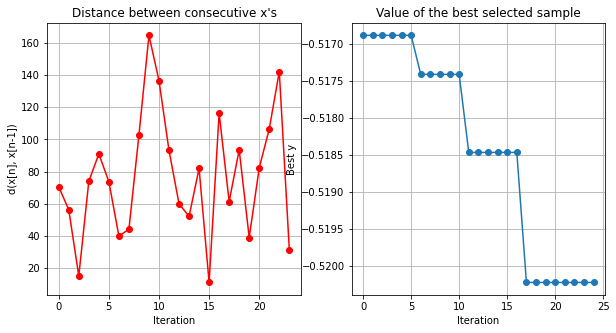

In [12]:
optimizer.plot_convergence()

In [13]:
rf_car = RandomForestClassifier(max_features=5,n_estimators=24)
rf_car.fit(X_train,y_train)
y_pred = rf_car.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.48810500410172275


{'max_features': 13, 'n_estimators': 185}
0.5177652912200796
{'max_features': 11, 'n_estimators': 85}
0.5160072031485928
{'max_features': 13, 'n_estimators': 86}
0.5156550904725364
{'max_features': 17, 'n_estimators': 60}
0.5174156538528182
{'max_features': 11, 'n_estimators': 143}
0.5153042154508775
{'max_features': 17, 'n_estimators': 197}
0.5165344439218793
{'max_features': 17, 'n_estimators': 143}
0.5153048342780762
{'max_features': 13, 'n_estimators': 193}
0.5165347533354786
{'max_features': 13, 'n_estimators': 149}
0.5179410381445085
{'max_features': 13, 'n_estimators': 178}
0.5161844971410183
{'max_features': 13, 'n_estimators': 34}
0.5105559543553059
{'max_features': 17, 'n_estimators': 164}
0.5165363004034753
{'max_features': 17, 'n_estimators': 178}
0.516183259486621
{'max_features': 17, 'n_estimators': 97}
0.5156553998861357
{'max_features': 17, 'n_estimators': 62}
0.5161826406594223
{'max_features': 17, 'n_estimators': 197}
0.5158314562241639
{'max_features': 17, 'n_estimat

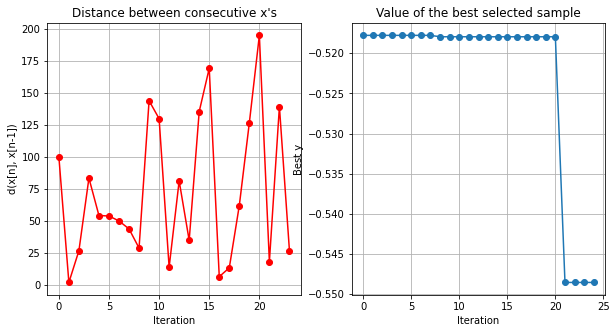

In [14]:
#RF classification - Matern52 + ExpQuad
kernel2 = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0) + GPy.kern.ExpQuad(input_dim=1,variance=1.0,lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=rf_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel2
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)

optimizer.plot_convergence()

In [15]:
rf_car2 = RandomForestClassifier(max_features=17,n_estimators=2)
rf_car2.fit(X_train,y_train)
y_pred = rf_car2.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.5291222313371616


In [16]:
#SVM Classification

bounds = [ {'name': 'C', 'type': 'continuous', 'domain': (0.1, 1)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0.01, 0.1)}
      ]

def svm_score(parameters):
  params = {
        'C': parameters[0][0],
        'gamma':parameters[0][1]
    }
  
  clf = svm.SVC(C=params['C'],gamma=params['gamma'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)
  print(params)
  print(score)
  return score

In [17]:
#SVM Classification - Matern52 kernel
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=svm_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)

{'C': 0.39585021330783177, 'gamma': 0.031213569985792472}
0.6493158865318449
{'C': 0.2746076794403783, 'gamma': 0.058641203455888}
0.6468520260402486
{'C': 0.5165587300709771, 'gamma': 0.045493745381083917}
0.6399954206787297
{'C': 0.658568331145704, 'gamma': 0.052869253192717416}
0.6296155226614519
{'C': 0.7931957716114976, 'gamma': 0.0822787600436595}
0.619414775118196
{'C': 0.3513800855453949, 'gamma': 0.08525790276898246}
0.6359482907992773
{'C': 0.18958851786805728, 'gamma': 0.062398655850800684}
0.6496664521399045
{'C': 0.1, 'gamma': 0.03509850073020177}
0.6512503403549592
{'C': 0.1, 'gamma': 0.06020238750986635}
0.6459695784549122
{'C': 0.1, 'gamma': 0.07702223874452463}
0.6392890294314216
{'C': 0.15352758708516068, 'gamma': 0.09926341719752566}
0.6399898512339415
{'C': 0.17585744350136354, 'gamma': 0.057436095310644815}
0.6508966806109062
{'C': 0.1732809548934162, 'gamma': 0.020485908428176908}
0.6556464887744746
{'C': 0.16566337037688197, 'gamma': 0.03144723041069906}
0.654767

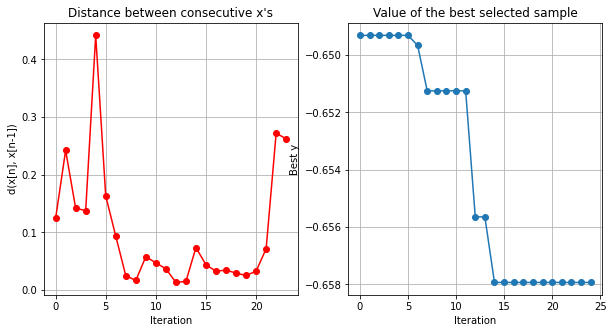

In [18]:
optimizer.plot_convergence()

In [19]:
SVM_car1 = svm.SVC(C=0.160,gamma=0.0172)
SVM_car1.fit(X_train,y_train)
y_pred = SVM_car1.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.640278917145201


{'C': 0.1356873176608454, 'gamma': 0.013188048897340819}
0.6575790861159929
{'C': 0.18743226371591853, 'gamma': 0.06505456199779329}
0.6482592390900765
{'C': 0.507187905697394, 'gamma': 0.07786508656705679}
0.6304948761107948
{'C': 0.28852433672946554, 'gamma': 0.06577916319186575}
0.6442148939330181
{'C': 0.9144505999121889, 'gamma': 0.0935875854769385}
0.6157197579147999
{'C': 0.1, 'gamma': 0.06751701651506269}
0.6435088120993093
{'C': 0.1, 'gamma': 0.06638114212842978}
0.643156699423253
{'C': 0.151134074012711, 'gamma': 0.09581218907235044}
0.6405174014208272
{'C': 0.13485593312544836, 'gamma': 0.02339090266465075}
0.6577582365900145
{'C': 0.12846092942155363, 'gamma': 0.013901125526119357}
0.6566997326666502
{'C': 0.13284038719850097, 'gamma': 0.025834300372034463}
0.6567028268026436
{'C': 0.12097047862116529, 'gamma': 0.08541566319249337}
0.6421025272902796
{'C': 0.13973739032428384, 'gamma': 0.056456781691001115}
0.6491364266442239
{'C': 0.17096808947350053, 'gamma': 0.0964106097

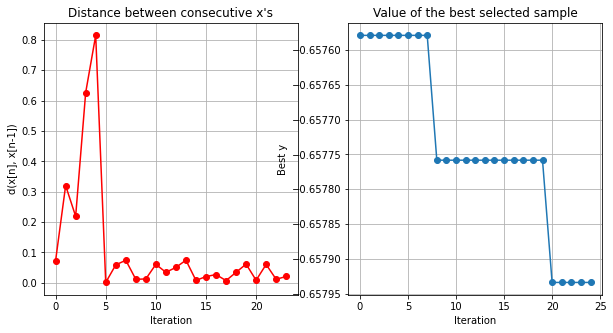

In [20]:
#SVM classification - Matern52 + ExpQuad
kernel2 = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0) + GPy.kern.ExpQuad(input_dim=1,variance=1.0,lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=svm_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel2
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)

optimizer.plot_convergence()

In [21]:
SVM_car2 = svm.SVC(C=0.135,gamma=0.0218)
SVM_car2.fit(X_train,y_train)
y_pred = SVM_car2.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.6398687448728466


In [22]:
#KNN Classification

#search domain
bounds = [ {'name': 'leaf_size', 'type': 'continuous', 'domain': (10, 50)},
        {'name': 'n_neighbors', 'type': 'discrete', 'domain': (3,4,5,6,7)}
      ]

def knn_score(parameters):
  params = {
        'leaf_size': parameters[0][0],
        'n_neighbors':int(parameters[0][1])
    }
  
  clf = KNeighborsClassifier(leaf_size=params['leaf_size'],n_neighbors=params['n_neighbors'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)
  print(params)
  print(score)
  return score

{'leaf_size': 34.51312369533584, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 45.151966784141415, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 23.562815362609008, 'n_neighbors': 4}
0.5847740661897571
{'leaf_size': 29.86316916906865, 'n_neighbors': 5}
0.5948018515309784
{'leaf_size': 12.152873971178298, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 11.723461498907753, 'n_neighbors': 3}
0.5758032377039035
{'leaf_size': 12.188168522180481, 'n_neighbors': 7}
0.5979566325899156
{'leaf_size': 12.063880489449604, 'n_neighbors': 7}
0.5979566325899156
{'leaf_size': 45.313280211706584, 'n_neighbors': 4}
0.5847740661897571
{'leaf_size': 45.06208603438827, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 34.38256028253113, 'n_neighbors': 5}
0.5948018515309784
{'leaf_size': 34.635417004852485, 'n_neighbors': 5}
0.5948018515309784
{'leaf_size': 44.86769205533318, 'n_neighbors': 5}
0.5948018515309784
{'leaf_size': 45.110392964791735, 'n_neighbors': 7}
0.5979566325899156
{'leaf_size

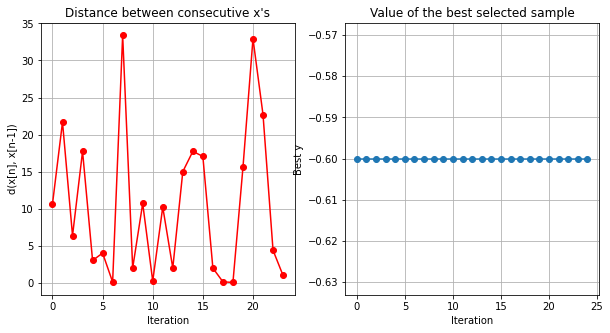

In [23]:
#KNN Classification - Matern52 kernel
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=knn_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)
optimizer.plot_convergence()

In [24]:
KNN_car1 = KNeighborsClassifier(leaf_size=34,n_neighbors=6)
KNN_car1.fit(X_train,y_train)
y_pred = KNN_car1.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.5742411812961444


{'leaf_size': 43.55712957542523, 'n_neighbors': 5}
0.5948018515309784
{'leaf_size': 13.040470350881087, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 28.442229513723237, 'n_neighbors': 5}
0.5948018515309784
{'leaf_size': 11.638246797105335, 'n_neighbors': 5}
0.5948018515309784
{'leaf_size': 15.342820060334827, 'n_neighbors': 4}
0.5847740661897571
{'leaf_size': 13.508408871394463, 'n_neighbors': 3}
0.5758032377039035
{'leaf_size': 43.5292271073777, 'n_neighbors': 3}
0.5758032377039035
{'leaf_size': 13.03889667957614, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 43.576538161215844, 'n_neighbors': 7}
0.5979566325899156
{'leaf_size': 28.47712735533701, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 13.081891455248519, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 28.503122346686613, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size': 12.991624285297513, 'n_neighbors': 5}
0.5948018515309784
{'leaf_size': 13.116094767256524, 'n_neighbors': 6}
0.6000708557142505
{'leaf_size

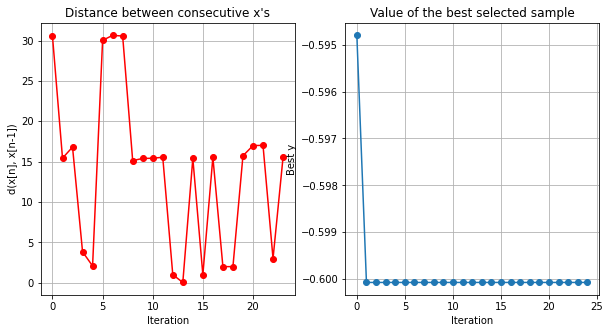

In [25]:
#KNN Classification - Matern52 + ExpQuad
kernel2 = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0) + GPy.kern.ExpQuad(input_dim=1,variance=1.0,lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=knn_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel2
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)
optimizer.plot_convergence()

In [26]:
KNN_car2 = KNeighborsClassifier(leaf_size=13,n_neighbors=6)
KNN_car2.fit(X_train,y_train)
y_pred = KNN_car2.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.5742411812961444
